# Feed Forward Neural Network for Image Classification on MNIST dataset

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

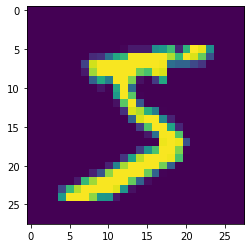

In [ ]:
# Dont do this, it will give heatmap, not a grayscale image

import matplotlib.pyplot as plt
plt.imshow(x_train[0]) 
plt.show()

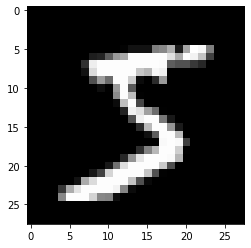

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()

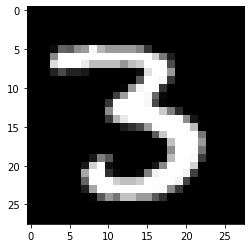

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[12], cmap='gray')
plt.show()

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

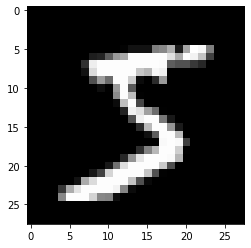

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()

Another thing to note is we will not be converting the input data into matrices of size NxD i.e. 2Darrays before passing them into the NN.

Instead, tf.keras layer can handle this flattening for us. It converts nx28x28 to Nx784, which is a 2D Matrix.

In [ ]:
# Build/Instantiate the model

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# sparse_categorical_crossentropy is similar to One Hot Encoding, sparse since most of the elements are zero.

In [ ]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2943 - accuracy: 0.9127 - val_loss: 0.1404 - val_accuracy: 0.9595
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1414 - accuracy: 0.9575 - val_loss: 0.1022 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1083 - accuracy: 0.9673 - val_loss: 0.0861 - val_accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0859 - accuracy: 0.9740 - val_loss: 0.0752 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0752 - accuracy: 0.9765 - val_loss: 0.0752 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0651 - accuracy: 0.9789 - val_loss: 0.0788 - val_accuracy: 0.9763
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0586 - accuracy: 0.9812 - val_loss: 0.0654 - val_accuracy:

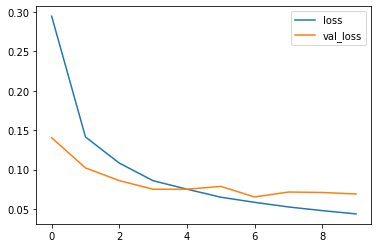

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

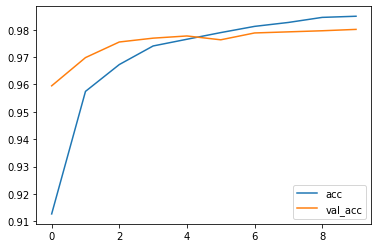

In [ ]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

Observation: Yes, the accuracy is pretty high , almost between 97-98%.

In [ ]:
# Evaluate the model

print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9801
[0.06909515708684921, 0.9800999760627747]


If we observe, the steps are quite similar to our previous NBs. Therefore, we say that these steps are model-agnostic(they dont care what the actual form of the model is).

Only what changes is the way we have built the model because in Tensorflow, we have to actually build the model.

# Happy Learning